In [ ]:
#In this project I am doing some eda of movies features to see strong and weak correlations 
#and top companies in gross, budget and profit 

In [1]:
#Set up stage 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



df = pd.read_csv('movies.csv')

In [2]:
#First look at the data 
df.head(50)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [3]:
#Looking for missing data 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f"{col} : {pct_missing}%")

name : 0.0%
rating : 0.010041731872717789%
genre : 0.0%
year : 0.0%
released : 0.0002608242044861763%
score : 0.0003912363067292645%
votes : 0.0003912363067292645%
director : 0.0%
writer : 0.0003912363067292645%
star : 0.00013041210224308815%
country : 0.0003912363067292645%
budget : 0.2831246739697444%
gross : 0.02464788732394366%
company : 0.002217005738132499%
runtime : 0.0005216484089723526%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df[df['rating'].isnull()]
#77 rows with missing values 

In [6]:
#as it is a learning project we only need rows with no missing data, so the best strategy is drop na. 
df=df.dropna()

In [7]:
#Change data type 
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['votes']=df['votes'].astype('int64')

In [8]:
#Released year and year do not match all the time, lets change format of realeased to year only as I do not need the rest of info 
df['released'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [9]:
#dropped year column as there is released column with same information 
df.drop(columns=['year'], inplace=True)

In [10]:
#Sort values by gross
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2015,5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1994,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2001,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


In [11]:
#Scatter plot budget/gross correlation 

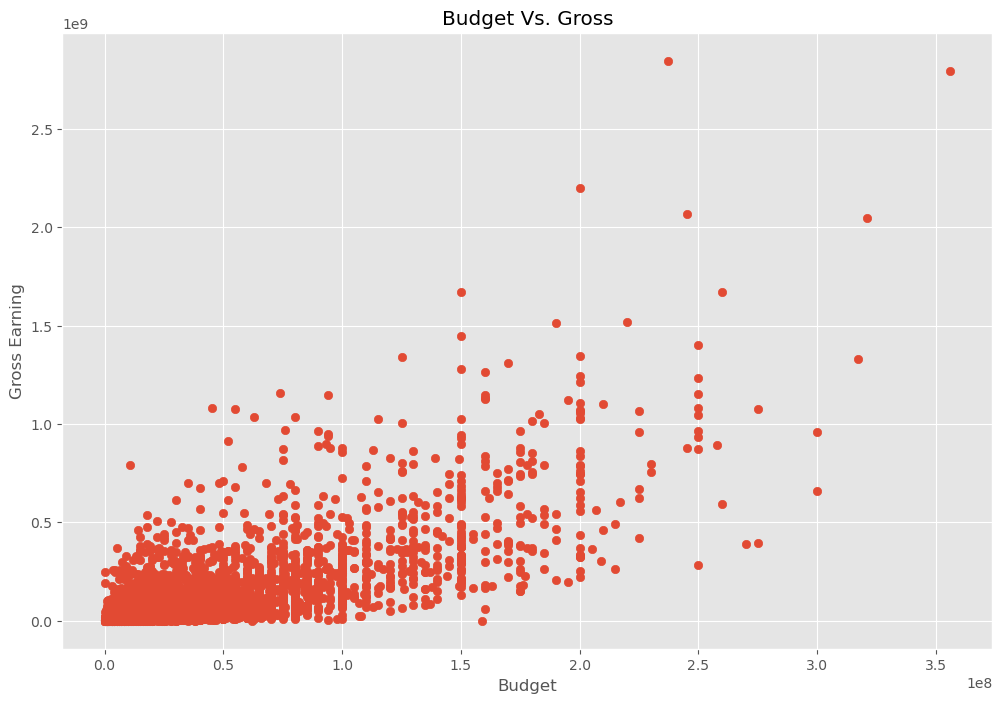

In [12]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget Vs. Gross')
plt.xlabel('Budget')
plt.ylabel('Gross Earning')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

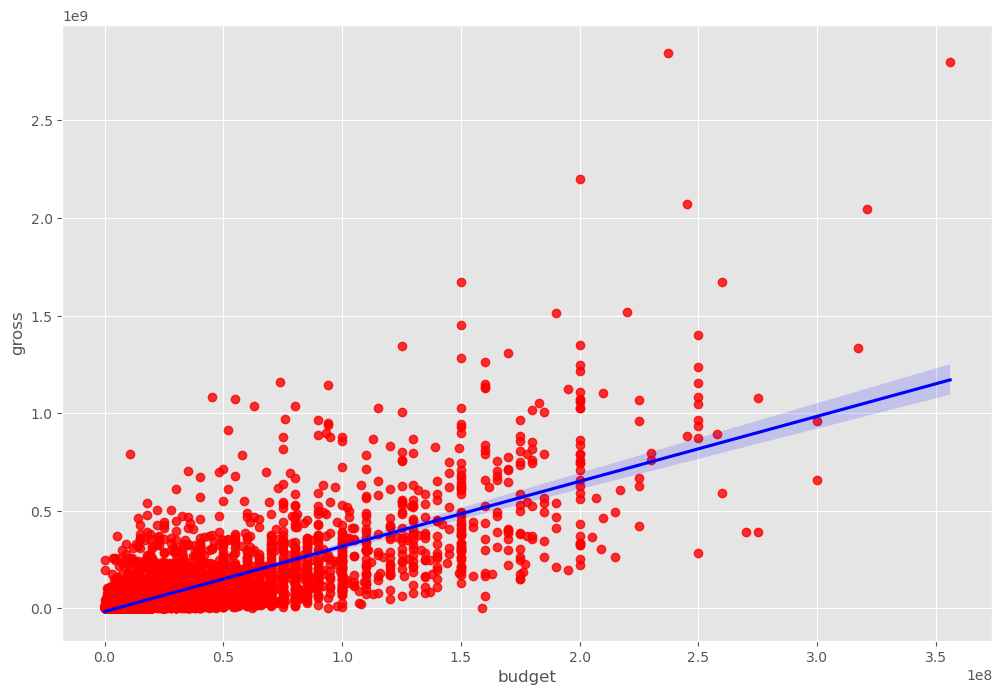

In [13]:
# Regression plot budget/gross correlation using seaborn 
sns.regplot(x='budget',y='gross', data=df, scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [14]:
#Correlations
corr_matrix = df.corr(numeric_only=True)

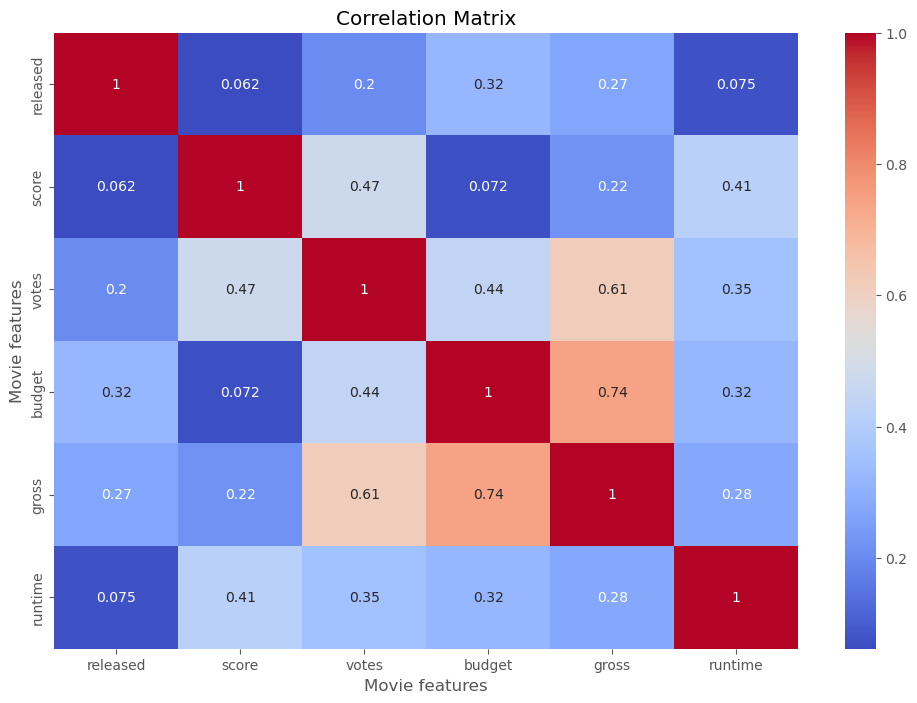

In [15]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [16]:
#Look at Companies and other non-numeric features 
#lets asign numeric values to them to add them to the heat map 
df_numbered = df.copy()

for col_name in df_numbered.columns:
    if (df_numbered[col_name].dtype == 'object' ):
        df_numbered[col_name]=df_numbered[col_name].astype('category')
        df_numbered[col_name]=df_numbered[col_name].cat.codes
                                           

In [17]:
df_numbered

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0
7649,3556,4,0,2020,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0
7650,1153,4,1,2020,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0
7651,3978,4,1,2020,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0


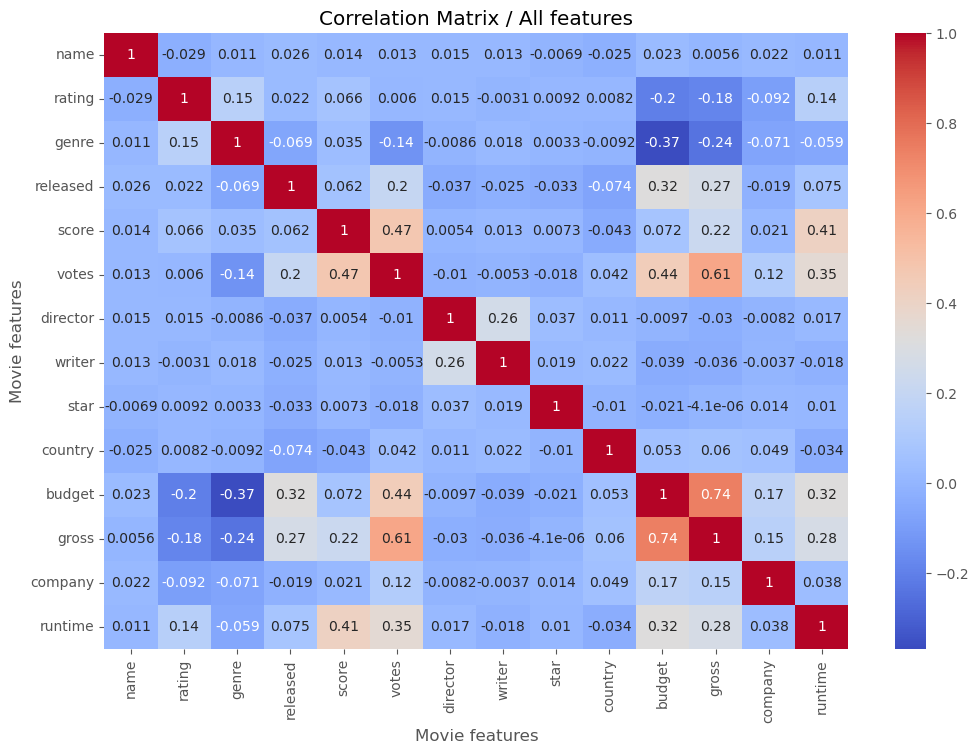

In [38]:
#Creating heat map for all features 
numbered_corr = df_numbered.corr(numeric_only=True)
sns.heatmap(numbered_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix / All features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [ ]:
#High positive correlation between budget and gross, gross and votes
#Weak negative correlation between genre and budget

In [ ]:
#See top money making companies 

In [40]:
gross_by_company = df.groupby('company')['gross'].sum().sort_values(ascending=False)

/var/folders/1c/vmvxy9892n5bj0hbvljtlf1h0000gn/T/ipykernel_1484/3048724397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y = top_companies.index, palette='viridis')


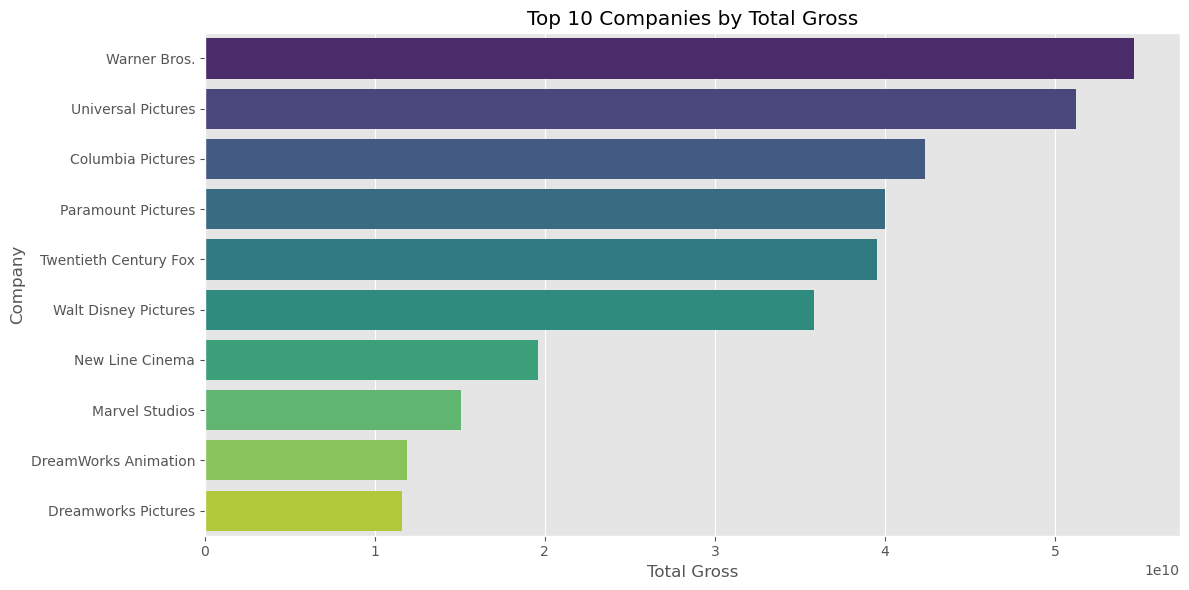

In [54]:
top_companies = gross_by_company.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_companies.values, y = top_companies.index, palette='viridis')
plt.xlabel("Total Gross")
plt.ylabel("Company")
plt.title("Top 10 Companies by Total Gross")
plt.tight_layout()
plt.show()



/var/folders/1c/vmvxy9892n5bj0hbvljtlf1h0000gn/T/ipykernel_1484/261542918.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies_budget.values, y = top_companies_budget.index, palette='viridis')


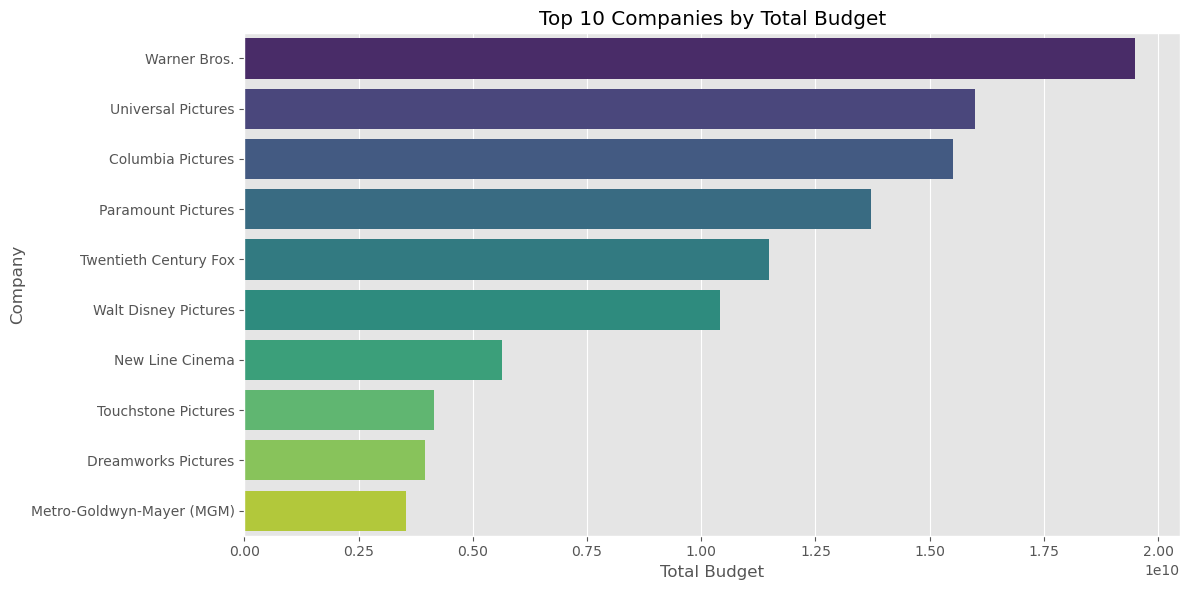

In [56]:
#See top biggest budget companies 

budget_by_company = df.groupby('company')['budget'].sum().sort_values(ascending=False)
top_companies_budget = budget_by_company.head(10)

plt.figure(figsize=(12,6))

sns.barplot(x=top_companies_budget.values, y = top_companies_budget.index, palette='viridis')
plt.xlabel("Total Budget")
plt.ylabel("Company")
plt.title("Top 10 Companies by Total Budget")
plt.tight_layout()
plt.show()

In [60]:
#Top 6 companies are the same in the both plots. Marvel Studio in the highest earnings, but not in budgets. 
#And Touchstone and MGM in opposite situation 

/var/folders/1c/vmvxy9892n5bj0hbvljtlf1h0000gn/T/ipykernel_1484/1850494456.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profit['profit'], y=top_profit.index, palette='crest')


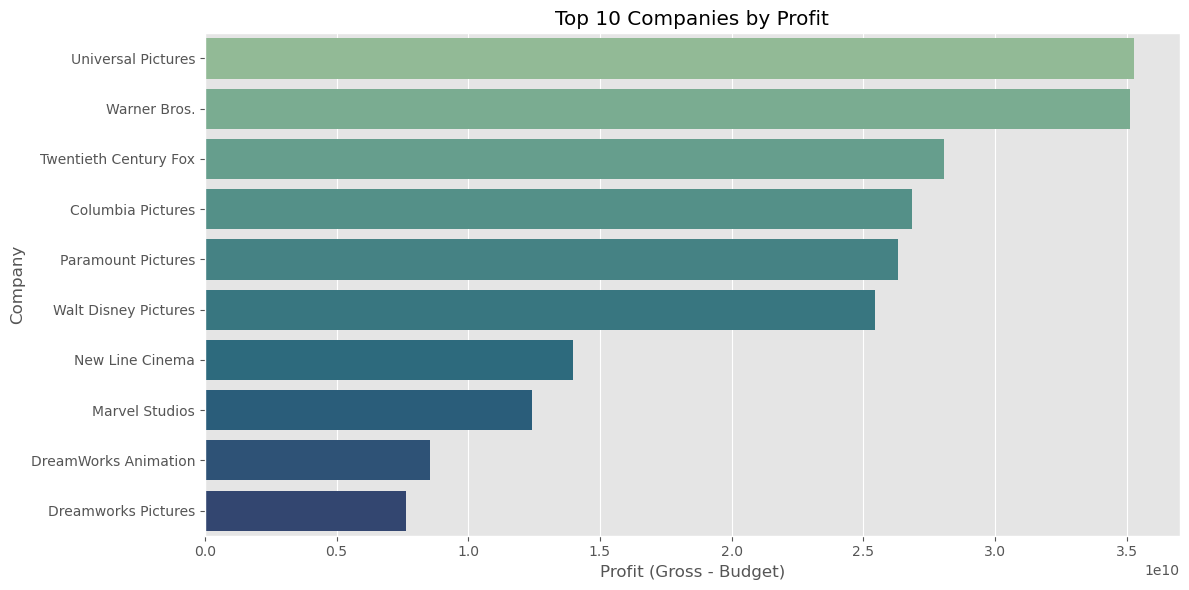

In [62]:
#Lets look at most profitable companies
company_summary = df.groupby('company')[['budget', 'gross']].sum()
company_summary['profit'] = company_summary['gross'] - company_summary['budget']
company_summary = company_summary.sort_values(by='profit', ascending=False)
top_profit = company_summary.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_profit['profit'], y=top_profit.index, palette='crest')
plt.title("Top 10 Companies by Profit")
plt.xlabel("Profit (Gross - Budget)")
plt.ylabel("Company")
plt.tight_layout()
plt.show()